Split Data

In [78]:
X_train,X_test, y_train, y_test = train_test_split(X_all,y, test_size=0.30)

In [ ]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1029, 48), Test Data Shape (441, 48)


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,JobRole_bool,HourlyRate_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
772,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1403,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
662,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,1,1,0
1387,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,1,0


Train Data

In [79]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

Logistic Regression

In [80]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 89.89
Accuracy CV 10-Fold: 87.76
Running Time: 0:00:02.063230



Support Vector Machine

In [81]:
# SVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 87.37
Accuracy CV 10-Fold: 85.62
Running Time: 0:00:01.619185


Linear Support Vector Machines

In [82]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 89.8
Accuracy CV 10-Fold: 87.46
Running Time: 0:00:00.541890


K Nearest Neighbour

In [83]:
# K Nearest Neighbour
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 88.92
Accuracy CV 10-Fold: 83.58
Running Time: 0:00:00.219038


Gaussian Naive Bayes

In [84]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 76.77
Accuracy CV 10-Fold: 74.83
Running Time: 0:00:00.106342


Perceptron

In [86]:
# Perceptron
start_time = time.time()
train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
perceptron_time = (time.time() - start_time)
print("Accuracy: %s" % acc_perceptron)
print("Accuracy CV 10-Fold: %s" % acc_cv_perceptron)
print("Running Time: %s" % datetime.timedelta(seconds=perceptron_time))

Accuracy: 88.24
Accuracy CV 10-Fold: 82.8
Running Time: 0:00:00.194112


Stochastic Gradient Descent

In [87]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 89.6
Accuracy CV 10-Fold: 85.52
Running Time: 0:00:00.211108


Decision Tree

In [88]:
# Decision Tree
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 79.11
Running Time: 0:00:00.135585


Gradient Boosting Trees

In [89]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 92.61
Accuracy CV 10-Fold: 86.2
Running Time: 0:00:01.610005


Random Forest

In [90]:
# Random Forest
start_time = time.time()
train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 86.01
Running Time: 0:00:01.846908



CatBoost Classifier

In [91]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [92]:
# pool training data and categorical feature labels together
train_pool = Pool(X_train, y_train,cat_features)  

In [93]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010429
0:	learn: 0.6838909	total: 53.2ms	remaining: 53.1s
1:	learn: 0.6746596	total: 57.1ms	remaining: 28.5s
2:	learn: 0.6671749	total: 60.9ms	remaining: 20.2s
3:	learn: 0.6596794	total: 64ms	remaining: 15.9s
4:	learn: 0.6523877	total: 67.3ms	remaining: 13.4s
5:	learn: 0.6453233	total: 70.4ms	remaining: 11.7s
6:	learn: 0.6398173	total: 74.9ms	remaining: 10.6s
7:	learn: 0.6322516	total: 78.1ms	remaining: 9.68s
8:	learn: 0.6258855	total: 81.3ms	remaining: 8.96s
9:	learn: 0.6199996	total: 84.5ms	remaining: 8.36s
10:	learn: 0.6137649	total: 87.7ms	remaining: 7.89s
11:	learn: 0.6094101	total: 89ms	remaining: 7.33s
12:	learn: 0.6047487	total: 90.5ms	remaining: 6.87s
13:	learn: 0.5980198	total: 93.7ms	remaining: 6.59s
14:	learn: 0.5915926	total: 96.9ms	remaining: 6.36s
15:	learn: 0.5868952	total: 98.6ms	remaining: 6.06s
16:	learn: 0.5810079	total: 102ms	remaining: 5.88s
17:	learn: 0.5754514	total: 104ms	remaining: 5.68s
18:	learn: 0.5701051	total: 107ms	remaining: 5.54s

In [94]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# cross-validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)
catboost_time = (time.time() - start_time)

# Cross-validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
24:	learn: 0.4085268	test: 0.4091761	best: 0.4091761 (24)	total: 92ms	remaining: 3.59s
25:	learn: 0.4062190	test: 0.4069096	best: 0.4069096 (25)	total: 93.9ms	remaining: 3.52s
26:	learn: 0.4014073	test: 0.4032473	best: 0.4032473 (26)	total: 97.9ms	remaining: 3.53s
27:	learn: 0.3962048	test: 0.4003775	best: 0.4003775 (27)	total: 101ms	remaining: 3.51s
28:	learn: 0.3913102	test: 0.3949219	best: 0.3949219 (28)	total: 105ms	remaining: 3.52s
29:	learn: 0.3873821	test: 0.3917105	best: 0.3917105 (29)	total: 109ms	remaining: 3.53s
30:	learn: 0.3838574	test: 0.3895761	best: 0.3895761 (30)	total: 113ms	remaining: 3.54s
31:	learn: 0.3803593	test: 0.3864618	best: 0.3864618 (31)	total: 117ms	remaining: 3.53s
32:	learn: 0.3788107	test: 0.3845112	best: 0.3845112 (32)	total: 119ms	remaining: 3.48s
33:	learn: 0.3770016	test: 0.3827767	best: 0.3827767 (33)	total: 122ms	remaining: 3.45s
34:	learn: 0.3725934	test: 0.3802804	best: 0.3802804 (34)	total: 126

Training Model Results

In [95]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_log,
        acc_svc,
        acc_linear_svc,
        acc_knn,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,  
        acc_dt,
        acc_gbt,
        acc_rf,
        acc_catboost
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,100.00
9,Random Forest,100.00
10,CatBoost,96.11
8,Gradient Boosting Trees,92.61
0,Logistic Regression,89.89
2,Linear SVC,89.80
6,Stochastic Gradient Decent,89.60
3,KNN,88.92
5,Perceptron,88.24
1,SVM,87.37


In [96]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_cv_log,
        acc_cv_svc,
        acc_cv_linear_svc,
        acc_cv_knn,
        acc_cv_gaussian,
        acc_cv_perceptron,
        acc_cv_sgd,  
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_rf,
        acc_cv_catboost
    ]})
cv_models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,87.76
2,Linear SVC,87.46
10,CatBoost,86.89
8,Gradient Boosting Trees,86.20
9,Random Forest,86.01
1,SVM,85.62
6,Stochastic Gradient Decent,85.52
3,KNN,83.58
5,Perceptron,82.80
7,Decision Tree,79.11


Predict Data using Logistic Regression

In [97]:
model = LogisticRegression().fit(X_train, y_train)

In [98]:
predictions = model.predict(X_test)

In [99]:
pred_df = pd.DataFrame(index=X_test.index)

In [100]:
pred_df['Attrition'] = predictions
pred_df.head()

,Attrition
211,0
618,0
555,0
777,0
1310,0


In [101]:
# Cross-validation accuracy metric
score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)

In [102]:
print("Accuracy: %s" % score)

Accuracy: 87.76


In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       368
           1       0.73      0.41      0.53        73

    accuracy                           0.88       441
   macro avg       0.81      0.69      0.73       441
weighted avg       0.87      0.88      0.86       441



Feature: 0, Score: -0.68082
Feature: 1, Score: 0.70818
Feature: 2, Score: -0.03096
Feature: 3, Score: 0.01456
Feature: 4, Score: -0.01300
Feature: 5, Score: 0.05515
Feature: 6, Score: 0.11113
Feature: 7, Score: -0.17144
Feature: 8, Score: -0.35275
Feature: 9, Score: -0.12130
Feature: 10, Score: 0.21729
Feature: 11, Score: -0.27016
Feature: 12, Score: 0.01556
Feature: 13, Score: 0.50775
Feature: 14, Score: 0.18364
Feature: 15, Score: -0.18724
Feature: 16, Score: 0.02336
Feature: 17, Score: -0.09864
Feature: 18, Score: 0.07168
Feature: 19, Score: -0.92357
Feature: 20, Score: 0.91998
Feature: 21, Score: 0.89168
Feature: 22, Score: -0.41526
Feature: 23, Score: -0.66699
Feature: 24, Score: 0.18697
Feature: 25, Score: 0.72378
Feature: 26, Score: 0.06940
Feature: 27, Score: 0.31746
Feature: 28, Score: -0.24247
Feature: 29, Score: 0.32015
Feature: 30, Score: -0.21962
Feature: 31, Score: -0.97229
Feature: 32, Score: -0.21824
Feature: 33, Score: -0.05525
Feature: 34, Score: -1.13573
Feature: 35,

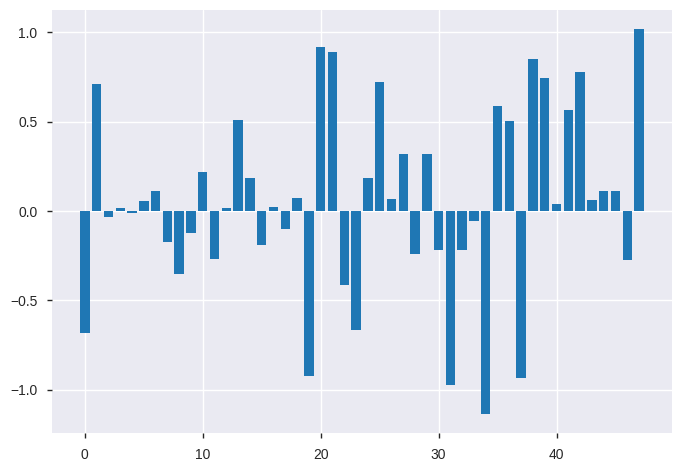

In [104]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()